# Example of weighted linear fit
Suppose to have the following measurements in arbirary unit of x and y and uncertainties only on variable y.

Calculate the best fit line (with weights) and  $χ^2 reduced$

In [ ]:
# import here all the packages we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
plt.rcParams['figure.figsize'] = (10,5) # size of figure
plt.rcParams['font.size'] = 16    # fonsize of the text
plt.rcParams['legend.fontsize'] = 14  # set fontsize of the legend
#plt.rcParams['lines.linestyle'] = '--'  # if needed we can specify the type of line style
#plt.rcParams['lines.linewidth'] = 2    #line width

In [ ]:
#Experimental data

example = {'x': [1.301,1.652,2.001,2.302,2.501,3.002],   # create a numpy array for x
'y': [ 10.0,18.1,28.0,39.1,47.1,67.0], 'Uncertainties on y':[1.8,2.1,5.2,2.0,2.1,4.6]} # we define here the data, by using dictionary and list.
ex_df=pd.DataFrame(data=example)
ex_df.head(8)
x=ex_df['x']
y=ex_df['y']
ex_yerr=ex_df['Uncertainties on y']
ex_df.head(7)

x     y  Uncertainties on y
0  1.301  10.0                 1.8
1  1.652  18.1                 2.1
2  2.001  28.0                 5.2
3  2.302  39.1                 2.0
4  2.501  47.1                 2.1
5  3.002  67.0                 4.6

In [ ]:
# To download as EXCEL file
#from google.colab import files
#ex_df.to_excel('example2.xlsx', index=False)
#files.download('example2.xlsx')

In [ ]:
def linear_fit(x,b,a):
    return b*x+a

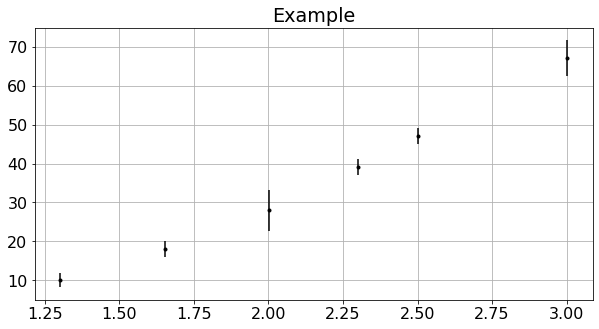

In [ ]:
# Create a graph showing the data with error bars
plt.errorbar(x,y, ex_yerr, fmt='.k')
plt.grid(True)
plt.title("Example")
plt.show()

Use the curve_fit method from scipy module

In [ ]:
# Fit
params, params_covariance = curve_fit(linear_fit, x, y,sigma=ex_yerr,absolute_sigma=True)
print(params) #Optimal values for the parameters so that the sum of the squared residuals is minimized.
slope = params[0] # slope b
intercept = params[1]   # intercept
u_intercept = np.sqrt(params_covariance[1][1]) # see above
u_slope = np.sqrt(params_covariance[0][0])   #see above

[ 31.68630756 -32.64415917]


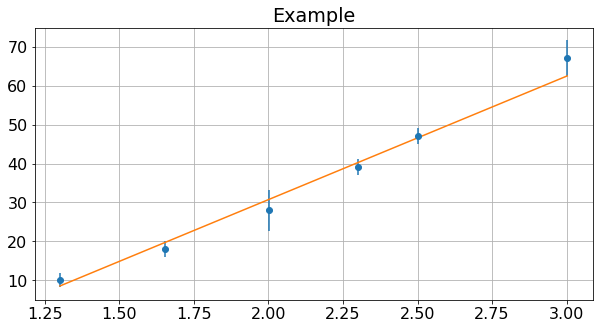

In [ ]:
 #Create a graph showing the data, the error bar and the best fit line
plt.errorbar(x,y,ex_yerr,fmt='o',label='Data')
# Create a graph of the best fit line to the data.
plt.plot(x,slope*x+intercept,label='Weighted Fit')
plt.title("Example")
plt.grid()
#plt.legend(loc='upper left') # with the 'loc' paramter you can choose where locate the legend
plt.show()

In [ ]:
print('The slope is b ={:5.1f} , with uncertainty {:5.1f} '.format(slope,u_slope))
print('The intercept is  a= {:5.1f}  with uncertainty {:5.1f} '.format(intercept,u_intercept))

The slope is b = 31.7 , with uncertainty   1.8 
The intercept is  a= -32.6  with uncertainty   3.7 


Plot of residuals

In [ ]:
x_data=x
y_data=y

residuals = y_data- linear_fit(x_data,slope,intercept)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print ("r squared=",r_squared)

r squared= 0.9840087202081431


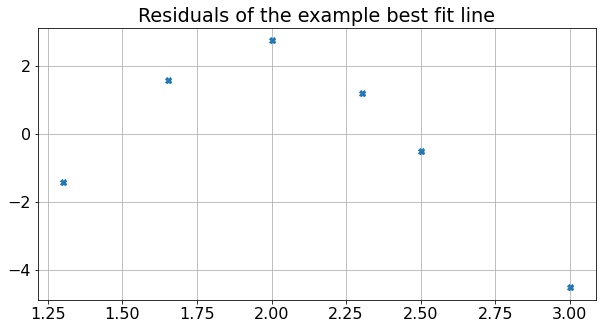

In [ ]:
#x_data and y_data and slope and intercept of the associated  fit

residuals=slope*x_data+intercept-y_data
plt.plot(x_data, residuals, 'X',label='residuals')
plt.title("Residuals of the example best fit line")
plt.grid()
plt.show()

Definition and calculation of  $χ^2$ reduced

In [ ]:
def reduced_chi_square(x, y, yerr, f, *args):
    '''reduced Chi-Squared function     # in Python triple quotation marks represents a more general category of comments, named 'docstrings'.It is used in function or module definition.
    x, y and yerr are numpy arrays, referring to x, y and yerr data
    f is the function we are fitting.
    args are the arguments of the function we have fit.
    '''
    return 1/(len(x)-len(args))*np.sum((f(x, *args)-y)**2/yerr**2)

In [ ]:
print("Reduced Chi squared=", reduced_chi_square(x_data,y_data,ex_yerr,linear_fit, *params))

Reduced Chi squared= 0.7167250472001354


What can we conclude with such a reduced chi-squared? Recall the material (video) of the activity on graphing to help you decide what can you conclude here....